In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models

In [2]:
df = pd.read_excel("Airlines+Data.xlsx")
df 

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
df1 = df.set_index('Month')
df1 

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


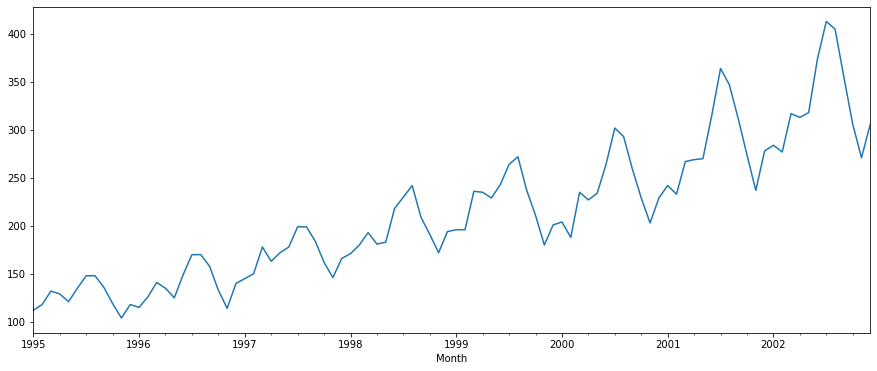

In [8]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

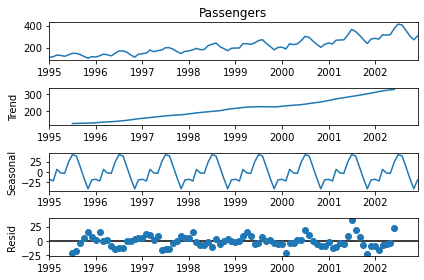

In [9]:

from statsmodels.tsa.seasonal import seasonal_decompose
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

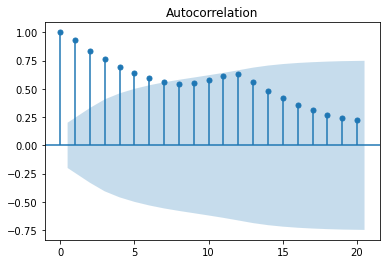

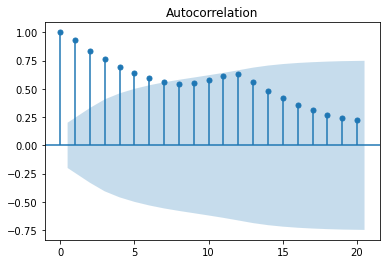

In [10]:
tsa_plots.plot_acf(df1['Passengers'])


In [9]:
# Building Time series forecasting with ARIMA


In [12]:
X = df1['Passengers'].values

In [13]:
size = int(len(X) * 0.66)

In [14]:
train, test = X[0:size], X[size:len(X)]

In [15]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(5,1,0))

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [16]:
model_fit = model.fit(disp=0)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Tue, 05 Oct 2021   AIC                            539.817
Time:                        18:14:27   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.236      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.498      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

In [18]:
#This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

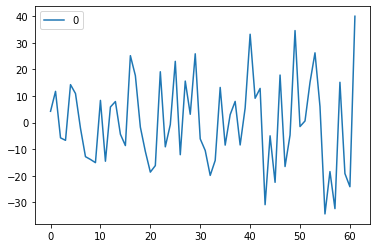

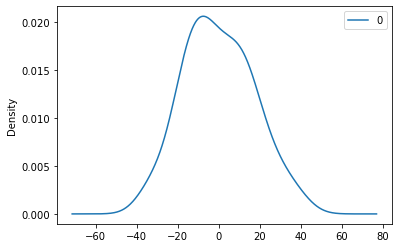

               0
count  62.000000
mean    0.057356
std    16.895802
min   -34.303296
25%   -12.610647
50%    -1.589474
75%    12.565602
max    39.955362


In [19]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [20]:
#Rolling Forecast ARIMA Model

In [21]:
history = [x for x in train]

In [22]:
predictions = list()

In [23]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    th = output[0]
    predictions.append(th)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (th, obs))

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=239.755183, expected=227.000000
predicted=220.737321, expected=234.000000
predicted=237.815011, expected=264.000000
predicted=252.750593, expected=302.000000
predicted=306.715786, expected=293.000000
predicted=285.374627, expected=259.000000
predicted=250.264002, expected=229.000000
predicted=227.093121, expected=203.000000
predicted=211.011456, expected=229.000000
predicted=253.260277, expected=242.000000
predicted=252.490675, expected=233.000000
predicted=234.042129, expected=267.000000
predicted=268.773620, expected=269.000000
predicted=261.782267, expected=270.000000
predicted=271.798049, expected=315.000000
predicted=314.422086, expected=364.000000
predicted=368.637726, expected=347.000000
predicted=334.957873, expected=312.000000
predicted=301.161836, expected=274.000000
predicted=265.936472, expected=237.000000
predicted=244.037200, expected=278.000000
predicted=312.961790, expected=284.000000
predicted=291.748136, expected=277.000000
predicted=284.551904, expected=317

In [24]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.494


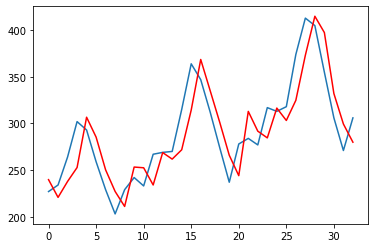

In [25]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [24]:
#A line plot is created with the expected values in blue compared to the rolling forecast predictions in red. 
#We can see the values show some trend and are in the correct scale

In [25]:
#Comparing Multiple Models

In [26]:
df2 = df.copy()

In [27]:
df2 = pd.get_dummies(df2, columns = ['Month'])

In [28]:
df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df2 = df2.rename(columns={"Month_1995-01-01 00:00:00":"month_1","Month_1995-02-01 00:00:00":"month_2",
                          "Month_1995-03-01 00:00:00":"month_3","Month_1995-04-01 00:00:00":"month_4",
                          "Month_1995-05-01 00:00:00":"month_5","Month_1995-06-01 00:00:00":"month_6",
                         "Month_1995-07-01 00:00:00":"month_7","Month_1995-08-01 00:00:00":"month_8",
                         "Month_1995-09-01 00:00:00":"month_9","Month_1995-10-01 00:00:00":"month_10",
                         "Month_1995-11-01 00:00:00":"month_11","Month_1995-12-01 00:00:00":"month_12"})
df2 

,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,355,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,306,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
t= np.arange(1,97)

In [41]:
df2['t'] = t

In [42]:
df2['t_sq'] = df2['t']*df2['t']

In [43]:
log_Passengers=np.log(df2['Passengers'])

In [44]:
df2['log_Passengers']=log_Passengers

In [45]:
df2.head()

,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [46]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [47]:
import statsmodels.formula.api as smf
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [48]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.1895551441541

In [49]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [51]:
additive= smf.ols('Passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

118.60439843615572

In [52]:
addlinear= smf.ols('Passengers~ month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

118.60439843615572

In [53]:
addquad=smf.ols('Passengers~t+t_sq+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

83.97481125259863

In [54]:
mulsea=smf.ols('log_Passengers~month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

122.20973607172188

In [55]:
mullin= smf.ols('log_Passengers~t+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

40.901945550711446

In [56]:
mul_quad= smf.ols('log_Passengers~t+t_sq+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

100.05904451760036

In [ ]:
#Conclusion: Multiplicative seasonality has the best rsme value